In [2]:
import numpy as np
from sklearn.datasets import load_iris

import graphviz 

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import export_graphviz, plot_tree

from sklearn.inspection import DecisionBoundaryDisplay

# Section 1

In [4]:
rng = np.random.RandomState(1) # Random but same for everytime being called
X = np.sort(5 * rng.rand(80, 1), axis=0) # Sorting from small to large of an 80x1 array
y = np.sin(X).ravel() # sin and the flatten it
y[::5] += 3 * (0.5 - rng.rand(16)) # make noise every 5 step

In [5]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2) # Maximum 2^2 terminal node
regr_2 = DecisionTreeRegressor(max_depth=5) # Maximum 2^5 terminal node
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [6]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] 
# An array from 0.0 to 5.0, step 0.01 but in size 500x(1)
# [:, np.newaxis] change it into 500x1
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

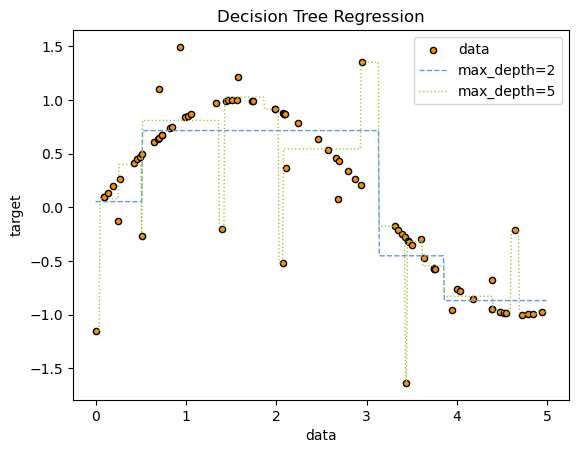

In [7]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=1, linestyle='dashed')
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=1, linestyle='dotted') # a bit over fitting?
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Section 2

In [4]:
X = [[0, 0], [1, 1], [0,1], [1,0]] 
Y = [0,       0,      1,     1   ] # Only either can be true, not both
clf = DecisionTreeClassifier()
clf = clf.fit(X, Y)

# Make prediction
print(clf.predict([[2., 2.]])) # Result is the classification
print(clf.predict_proba([[2., 2.]])*100, clf.classes_) # Result is the percentage for each class

[0]
[[100.   0.]] [0 1]


In [6]:
iris = load_iris() # Data loading
X, y = iris.data, iris.target

In [8]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

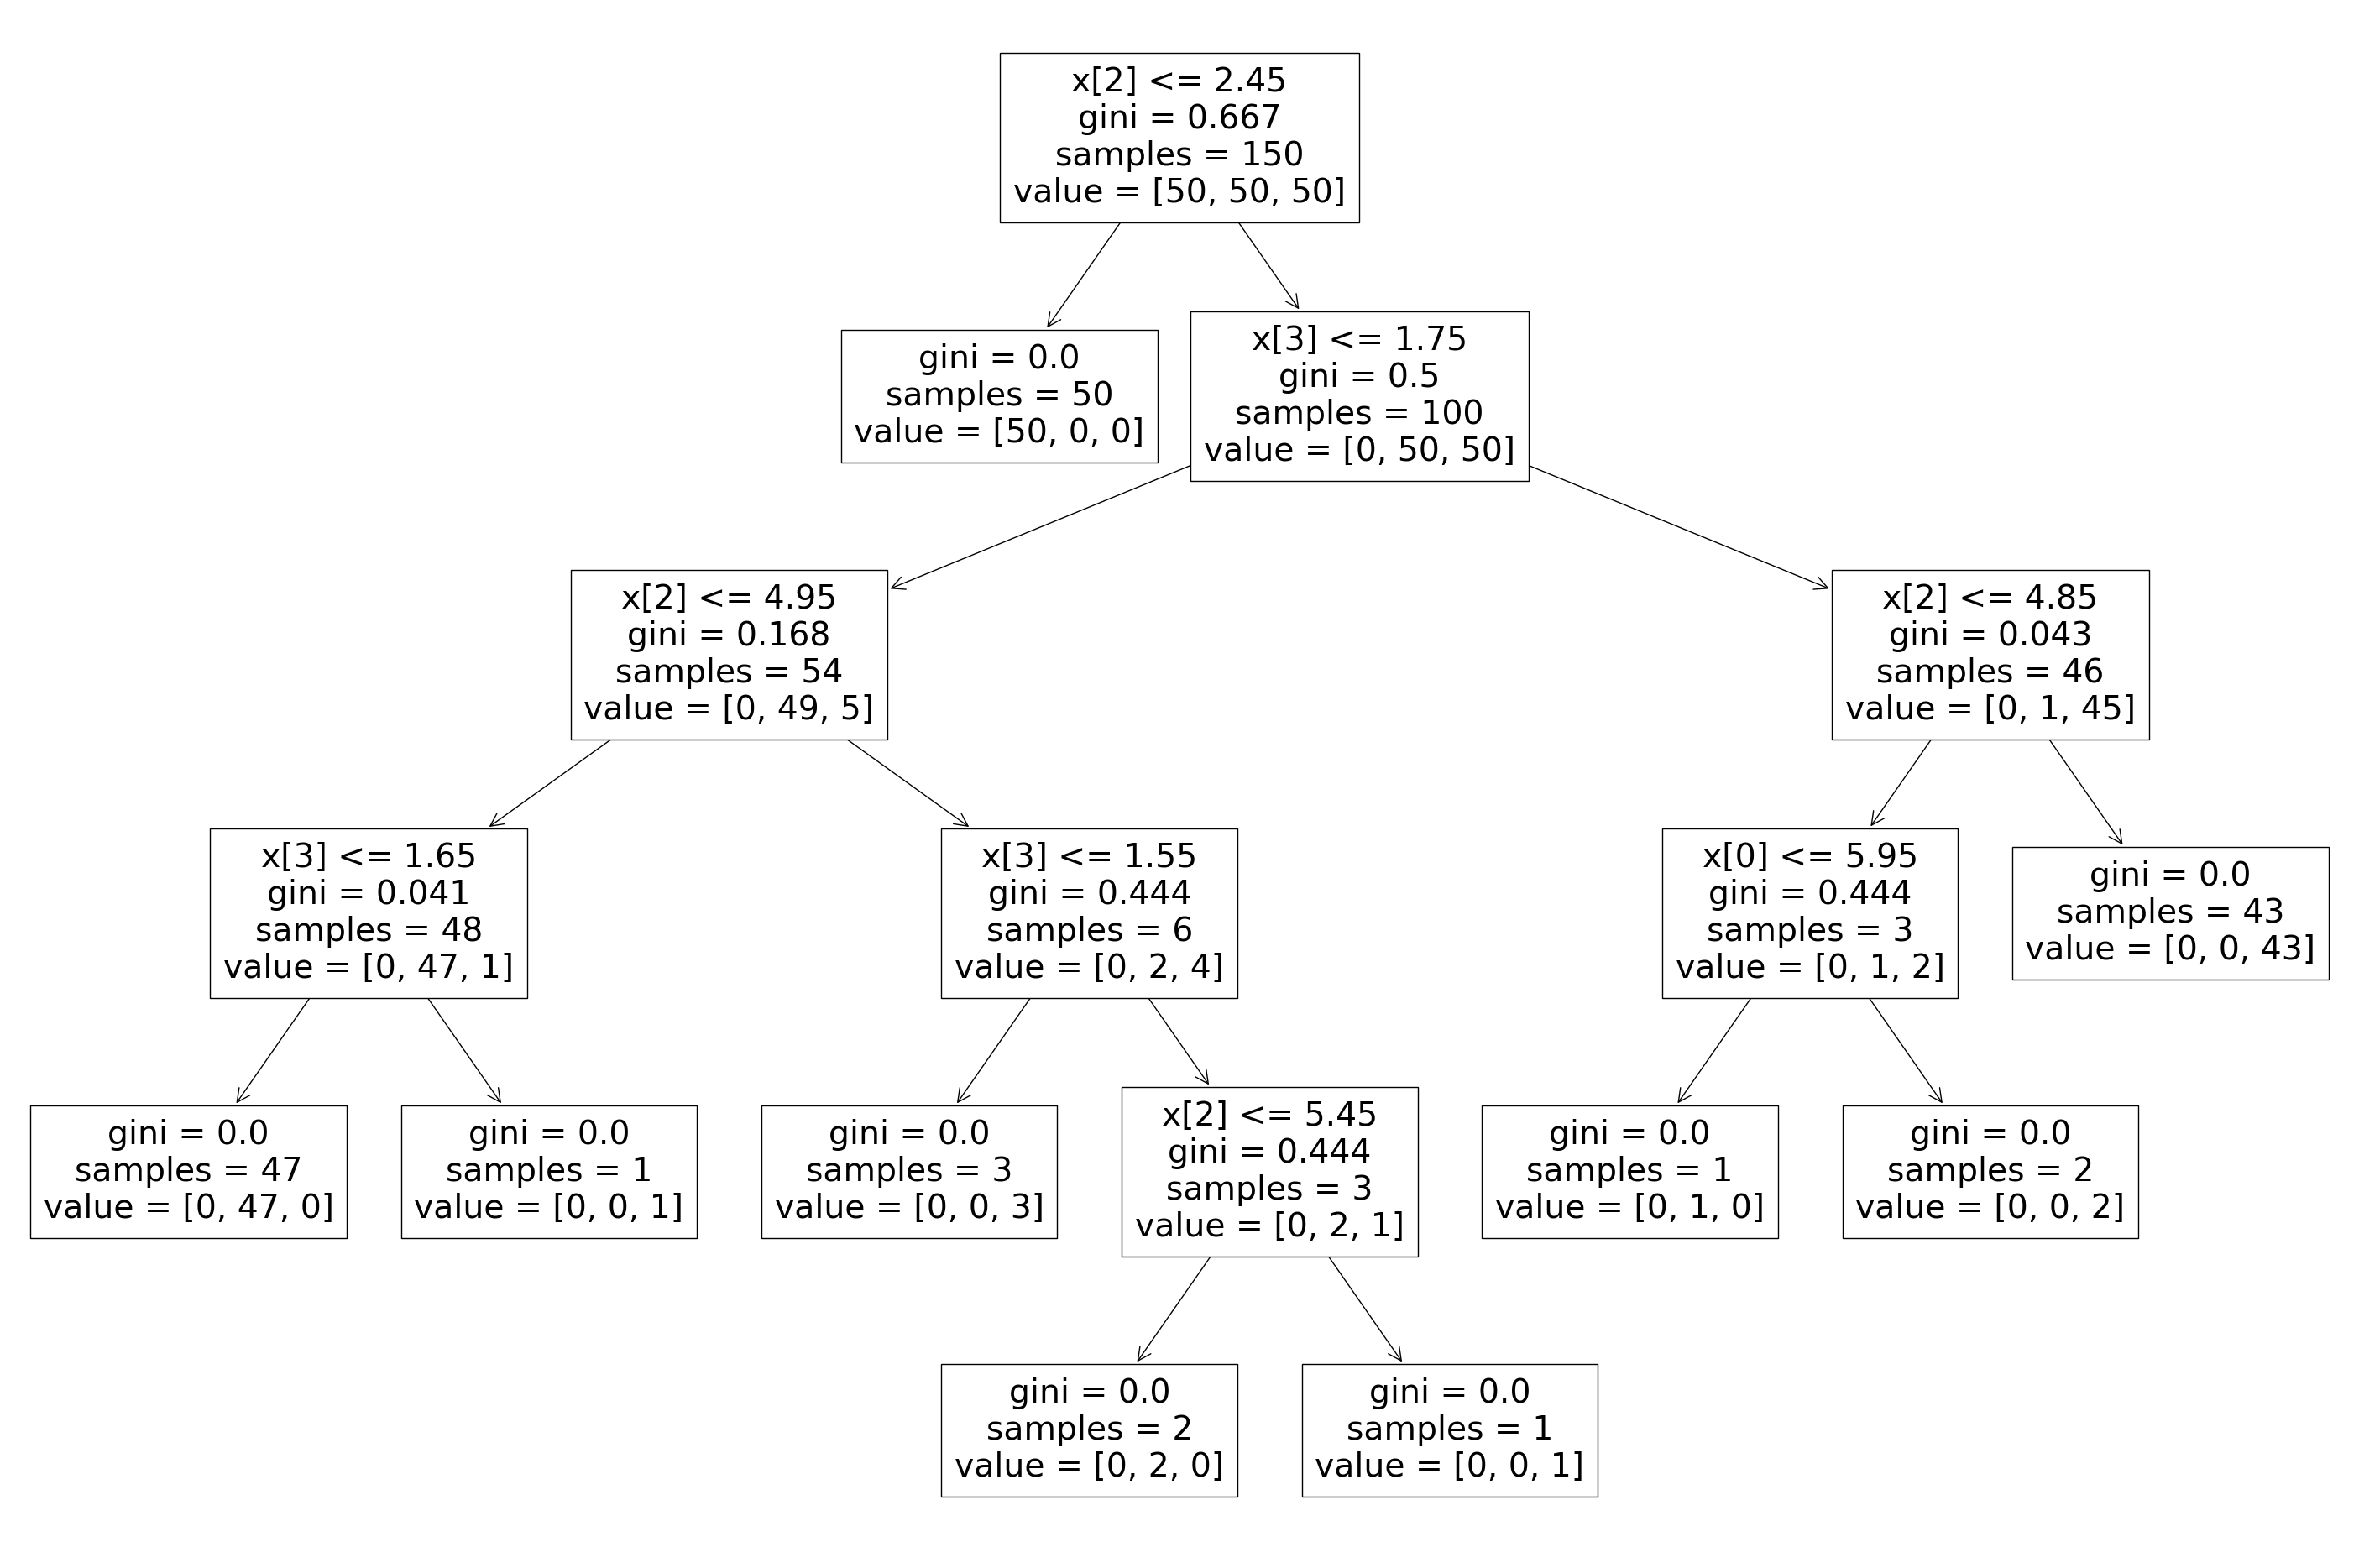

In [10]:
plt.figure(figsize=(36, 24))
plot_tree(clf)

In [12]:
clf.get_depth()

5

In [13]:
dot_data = export_graphviz(clf, out_file=None)  # Something visualising but error! Need to be fixed
graph = graphviz.Source(dot_data) 
graph

dot_data = export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [14]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2) 
# Different from above, with given argument
# Above is overfitting when it maximise the depth of the model (take everything into consideration)
decision_tree = decision_tree.fit(X, y) # Remind: X, y = iris.data, iris.target
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



## Visualise decision boundary

In [16]:
n_classes = 3 # 3 types of flower in iris
plot_colors = "ryb" # red, yellow, blue
plot_step = 0.02

/var/folders/px/rpgbb1vs07g7l4_2lymxg5qc0000gn/T/ipykernel_2753/1797930262.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter( # Remind: X now is the data with only selected pair
/var/folders/px/rpgbb1vs07g7l4_2lymxg5qc0000gn/T/ipykernel_2753/1797930262.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter( # Remind: X now is the data with only selected pair
/var/folders/px/rpgbb1vs07g7l4_2lymxg5qc0000gn/T/ipykernel_2753/1797930262.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter( # Remind: X now is the data with only selected pair
/var/folders/px/rpgbb1vs07g7l4_2lymxg5qc0000gn/T/ipykernel_2753/1797930262.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter( # Remind: X now is the data with only selected pair
/var/folders/px/rpgbb1vs07g7l4_2lymxg5qc0000

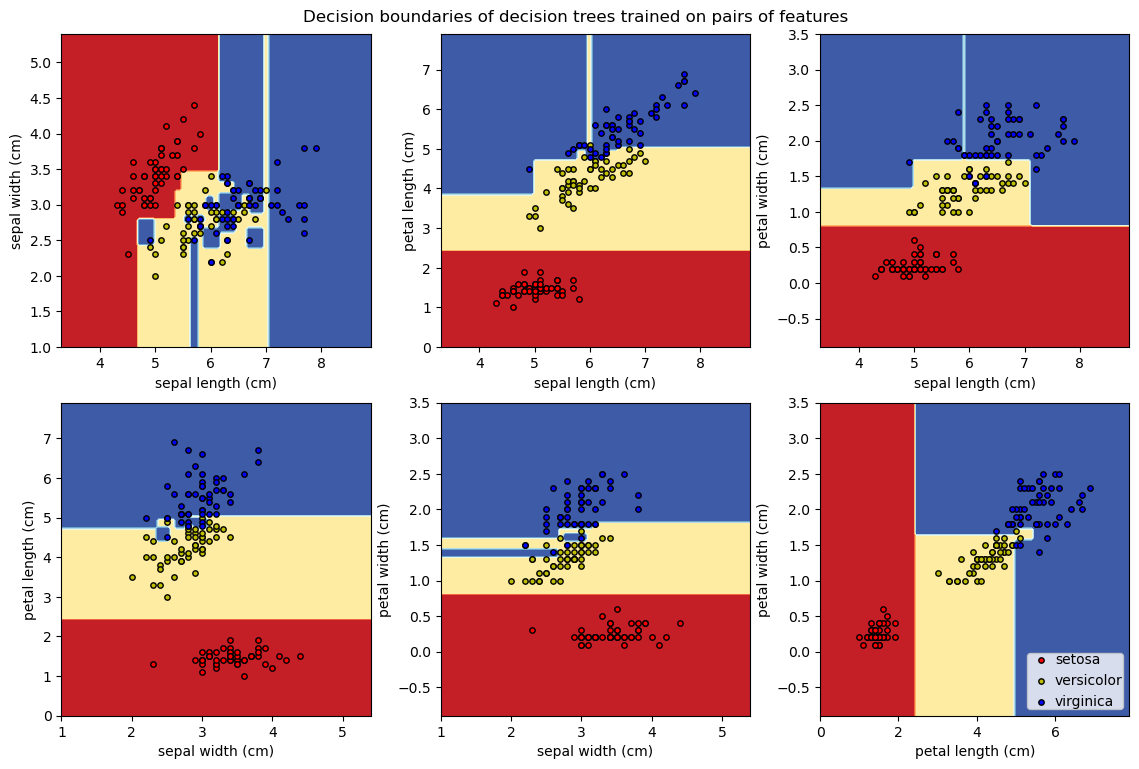

In [17]:
plt.figure(figsize=(12, 8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]): # 6x2 
    # We only take the two corresponding features         # Combination of 2 in 4 features
    X = iris.data[:, pair] # Pick the pair of feature
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1) # 2 row, 3 column, position (0-5)+1 into (1-6)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    DecisionBoundaryDisplay.from_estimator(
        clf, # model
        X, # input
        cmap=plt.cm.RdYlBu,
        response_method="predict", # predict directly instead of having separate step
        ax=ax, # position
        xlabel=iris.feature_names[pair[0]], # pair size: 2x(1)
        ylabel=iris.feature_names[pair[1]], # using the number in the pair to recall its name to put in the row/column name
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors): # plot_colors includes red, yellow, blue
        idx = np.where(y == i) 
        # i is now an index to distinguish the flower (0-1-2 or range(3))
        # idx is the index that match with that flower
        plt.scatter( # Remind: X now is the data with only selected pair
            X[idx, 0],
            X[idx, 1],
            c=color,
            cmap=plt.cm.RdYlBu,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision boundaries of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

## Visualising for only 1 pair but different depth (the more depth, the more overfitting)

In [44]:
n_classes = 3       # 3 types of flowers
plot_colors = "ryb" # red, yellow, blue
plot_step = 0.02

pair = [1,0] # Only use this specific pair

X = iris.data[:, pair]
y = iris.target

plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

/var/folders/px/rpgbb1vs07g7l4_2lymxg5qc0000gn/T/ipykernel_2753/3359463292.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter( # Remind: X now is the data with only selected pair
/var/folders/px/rpgbb1vs07g7l4_2lymxg5qc0000gn/T/ipykernel_2753/3359463292.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter( # Remind: X now is the data with only selected pair
/var/folders/px/rpgbb1vs07g7l4_2lymxg5qc0000gn/T/ipykernel_2753/3359463292.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter( # Remind: X now is the data with only selected pair
/var/folders/px/rpgbb1vs07g7l4_2lymxg5qc0000gn/T/ipykernel_2753/3359463292.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter( # Remind: X now is the data with only selected pair
/var/folders/px/rpgbb1vs07g7l4_2lymxg5qc0000

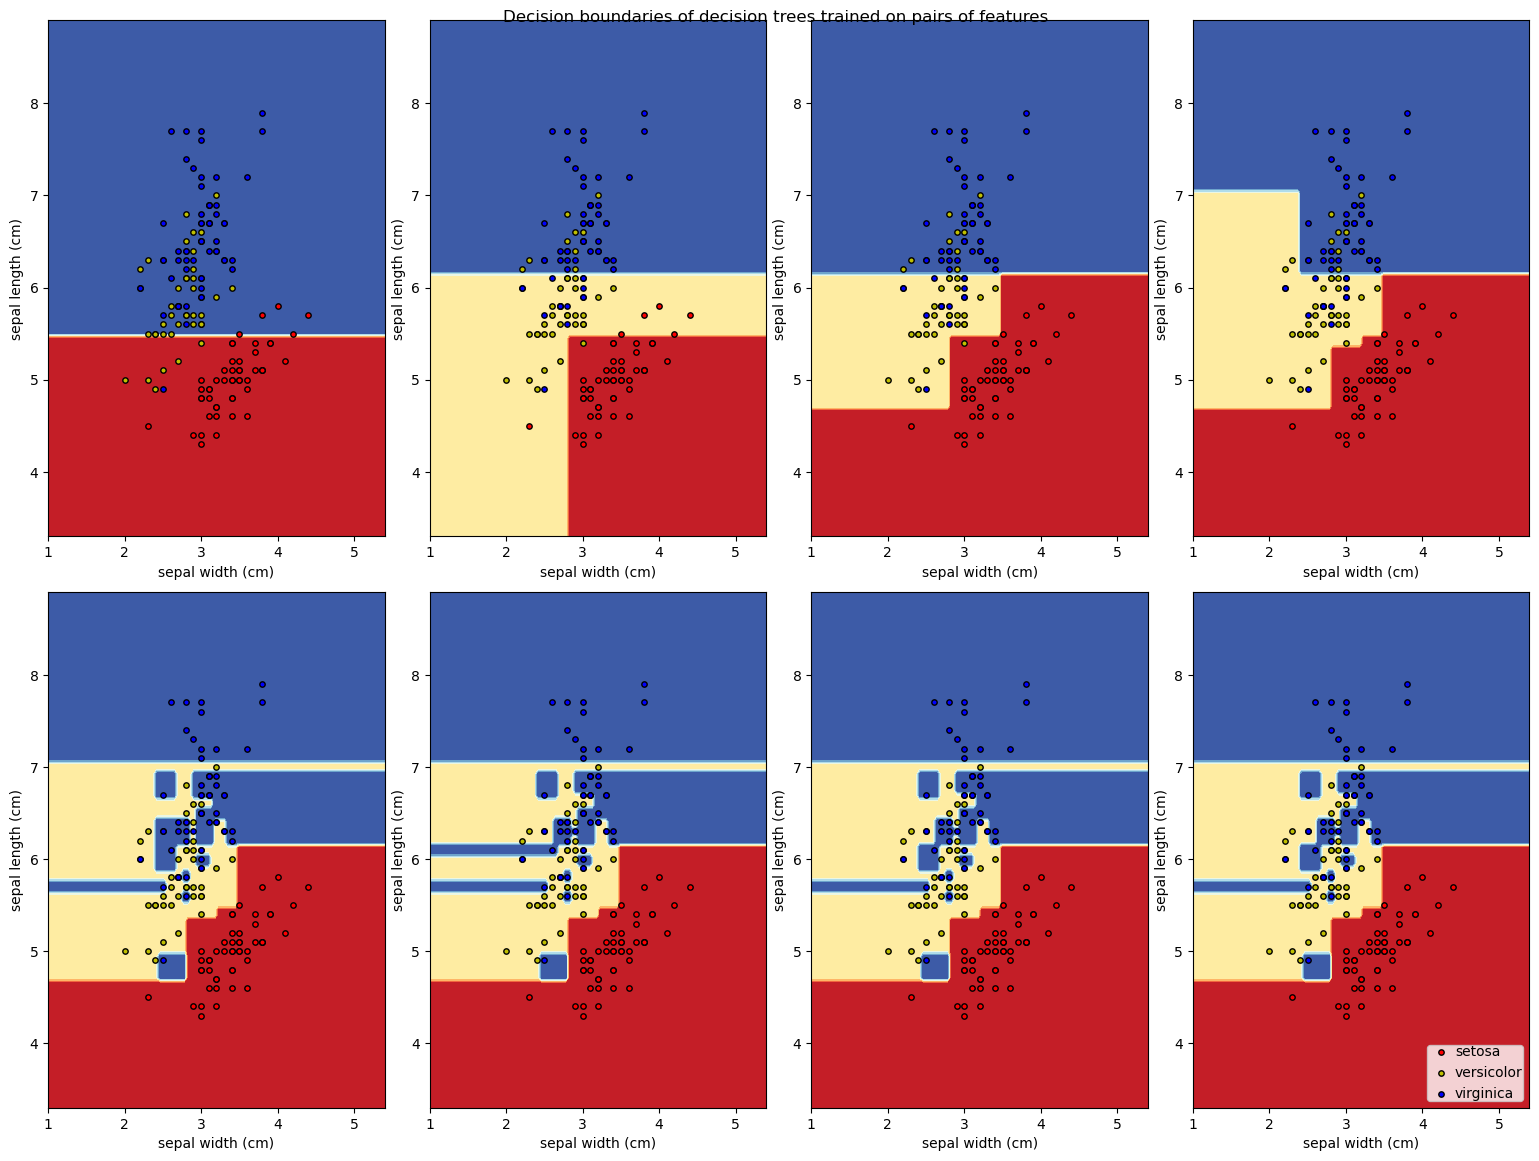

In [46]:
plt.figure(figsize=(16, 12))

for idx, depth in enumerate([1,2,3,4,10,20,30,50]): # Visualising for different 
    # Train
    clf = DecisionTreeClassifier(max_depth=depth).fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 4, idx + 1) # 2 row, 4 column, position (0-7)+1 into (1-8)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    DecisionBoundaryDisplay.from_estimator(
        clf, # model
        X, # input
        cmap=plt.cm.RdYlBu,
        response_method="predict", # predict directly instead of having separate step
        ax=ax, # position
        xlabel=iris.feature_names[pair[0]], # pair size: 2x(1)
        ylabel=iris.feature_names[pair[1]], # using the number in the pair to recall its name to put in the row/column name
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors): # plot_colors includes red, yellow, blue
        idx = np.where(y == i) 
        # i is now an index to distinguish the flower (0-1-2 or range(3))
        # idx is the index that match with that flower
        plt.scatter( # Remind: X now is the data with only selected pair
            X[idx, 0],
            X[idx, 1],
            c=color,
            cmap=plt.cm.RdYlBu,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision boundaries of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

# Cross-Validation

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [51]:
X = iris.data
y = iris.target

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 40)

In [57]:
clf = DecisionTreeClassifier() # Without any argument

In [59]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 10, 20, 30, 50],
    'criterion': ['gini', 'entropy']
}

In [61]:
gsCV = GridSearchCV(
                estimator = clf, # Model we want to check
                param_grid = param_grid, # Reference for the function to choose
                cv=5) # number of fold
gsCV.fit(X_train, y_train) # Based on the training data, put them in the CV function check for further information

# Get the best parameters
best_params = gsCV.best_params_
best_params

{'criterion': 'gini', 'max_depth': 3}

In [71]:
best_model = DecisionTreeClassifier(criterion = best_params['criterion'], max_depth = best_params['max_depth'])
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [75]:
y_pred = best_model.predict(X_test)
y_actual = y_test

In [77]:
accuracy_score(y_actual, y_pred)

0.9666666666666667